<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/ASOS%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASOS데이터

In [1]:
suppressPackageStartupMessages({
  require(dplyr)
  require(magrittr)
  require(stringr)
  require(data.table)
  require(lubridate)
})

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
install.packages(c("DataExplorer", "sqldf", "pacman"))
pacman::p_load("DataExplorer", "sqldf")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘htmlwidgets’, ‘igraph’, ‘plogr’, ‘reshape2’, ‘gridExtra’, ‘networkD3’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’




In [20]:
#as.data.frame(installed.packages()) %>% 
#  filter(grepl("^lu", Package))

,Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,MD5sum,NeedsCompilation,Built
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
lubridate,lubridate,/usr/lib/R/site-library,1.8.0,NA,"methods, R (>= 3.2)",generics,cpp11 (>= 0.2.7),"covr, knitr, testthat (>= 2.1.0), vctrs (>= 0.3.0), rmarkdown","chron, timeDate, tis, zoo",GPL (>= 2),NA,NA,NA,NA,yes,4.1.1


# 패키지 및 데이터 로드

In [3]:
system("gdown --id 1f-pqUZfDa9zTIa8aTmS9LdKuPuJKdIaq") # 기온
system("gdown --id 1mjGQ4CQhJ0fOeI6xJctUNAcpqp3dNMXy") # 기압 
system("gdown --id 1COhiDKZd4vAhUk58C6tStfo0SttL70Po") # 상대습도
system("gdown --id 1UTHsx-khvHGjiR7S2AjQ7X_eH7kMIBbH") # 구름
system("gdown --id 1BRG3_t6fr7O9SG1EST5Qeu_uPnA7h7ya") # 안개
system("gdown --id 1jPJW-vaUbc1NTgnWKHRujyyulFiiP19t") # 일조 
#system("gdown --id 11xsQ2gbdku3SjwVNbJMUviulk8qasvge") # 적설 
system("gdown --id 1lu2nuvDgf2yjPdweXTKdy02GqZXZUpQp") # 증기압
system("gdown --id 1GdvlBPW8fl8EWkzFigvzx7QrKJnFxsBi") # 증발량 
system("gdown --id 1uZAZd9KcLU9LvId87328SBDK1h_YpSrm") # 초상온도
system("gdown --id 1fKuuq6NjT3hs4LP0KjJcndxxNwrBPMgc") # 지면온도
system("gdown --id 1FNGHOXDj-ZvULH9MLeC-78IPF9wppWKS") # 바람
system("gdown --id 1bEpTD5r8HEBenw8ywCLUe-P8LZSY-yg7") # 강수
system("gdown --id 1C--yFaAMBZWQ-VPrBOZFJms8DphBlCIu") # 관측지점

In [189]:
system("gdown --id 1Xh_5ao476L-0d6qkRY5OPWfQ-K8CTbtP") # 적설_찐
#system("gdown --id 13_OK8hReJhfMCDvf7G_KEgexQvRXXyD4") # 구름_평년
system("gdown --id 1OCO2yZVlvDt_Fbey8RP4WV5AQNrmUxNA") # 상대습도_비교

In [4]:
기상관측지점= fread("종관기상관측_ASOS_지점.csv")
기온= fread("ASOS_기온.csv")
기압= fread("ASOS_기압.csv")
구름 = fread("ASOS_구름.csv")
상대습도 = fread("ASOS_상대습도.csv")
안개 = fread("ASOS_안개.csv")
일조= fread("ASOS_일조.csv")
#적설 = fread("ASOS_적설.csv")
증기압 = fread("ASOS_증기압.csv")
증발량 = fread("ASOS_증발량.csv")
초상온도 = fread("ASOS_초상온도.csv")
지면온도 =  fread("ASOS_지면온도.csv")
바람 = fread("ASOS_바람.csv")
강수 = fread("ASOS_강수.csv")

In [190]:
적설 = fread("ASOS_적설_2016.csv")
#구름_평년 = fread("ASOS_구름_평년.csv")
상대습도_비교=fread("ASOS_상대습도_비교.csv")

# 변수명 변경

In [5]:
#기온
nchar = nchar("db_sfc_ta_dd.")
names(기온)= str_sub(names(기온),nchar+1)

In [6]:
#기압
nchar = nchar("db_sfc_prsr_dd.")
names(기압)= str_sub(names(기압),nchar+1)

In [7]:
#colnames(상대습도)
names(상대습도)= str_sub(names(상대습도),nchar("db_sfc_rhm_dd.")+1)

In [8]:
#colnames(구름)
names(구름)= str_sub(names(구름),nchar("db_sfc_cloud_dd.")+1)

In [9]:
#colnames(안개) 
names(안개)= str_sub(names(안개),nchar("db_sfc_fog_dd.")+1)

In [10]:
# colnames(일조) db_sfc_icsr_ss_dd.
names(일조)= str_sub(names(일조),nchar("db_sfc_icsr_ss_dd.")+1)

In [11]:
#colnames(적설)
#names(적설)= str_sub(names(적설),nchar("db_sfc_dsnw_dd.")+1)

In [12]:
#colnames(증기압) 
names(증기압)= str_sub(names(증기압),nchar("db_sfc_pv_dd.")+1)

In [13]:
#colnames(증발량) 
names(증발량)= str_sub(names(증발량),nchar("db_sfc_ev_dd.")+1)

In [14]:
#colnames(초상온도) db_sfc_lwt_tg_dd.
names(초상온도)= str_sub(names(초상온도),nchar("db_sfc_lwt_tg_dd.")+1)

In [15]:
#지면온도
names(지면온도)

[1] "tma"    "stn_id" "avg_ts" "max_ts" "min_ts"

In [16]:
#names(바람)  
names(바람)= str_sub(names(바람),nchar("db_sfc_wind_dd.")+1)

In [17]:
#names(강수) db_sfc_rn_dd.
names(강수)= str_sub(names(강수),nchar("db_sfc_rn_dd.")+1)

In [128]:
#names(기상관측지점)
names(기상관측지점) = gsub("\\(.*?\\)","", names(기상관측지점))

In [131]:
names(기온)

[1] "tma"    "stn_id" "avg_ta" "max_ta" "min_ta"

In [134]:
기상관측지점 %<>% rename(stn_id=지점번호, longitude=경도, latitude=위도,region=지점명, forcast_code=예보구역코드)

In [19]:
# 확인
ls()

[1] "nchar"        "강수"         "구름"         "기상관측지점" "기압"        
 [6] "기온"         "바람"         "상대습도"     "안개"         "일조"        
[11] "증기압"       "증발량"       "지면온도"     "초상온도"

# 변수 추출
1. `기온(ta)` - 시각(PK), 지점번호(PK), 평균기온, 최고기온, 최저기온
2. `기압` - 시각(PK), 지점번호(PK), 평균현지기압(PA), 최대현지기압, 최소현지기압 , 평균해면기압(PS), 최대해면기압, 최소해면기압
3. `상대습도(rhm)`- 평균상대습도, ~~최대상대습도~~, 최소상대습도
4. ~~`구름` - 평균 중하층운량(avg_lmac), 평균 전운량(avg_tca)(목측),최저 운고(min_ch), 최다 운량(max_ca)~~
5. ~~`안개`~~
6. `일조` - 합계 일조 시간(sum_ss_hr), 일조율(ssrate)
7. ~~`적설` - 일 최심적설(dd_mes), 일 최심신적설(dd_mefs)~~ **2016까지 다시 받아야함**
8. `증기압(pv)` - 평균 증기압, 최대 증기압, 최저 증기압
9. `증발량` - 합계 소형 증발량 (sum_sml_ev), 합계 대향 증발량 (sum_lrg_ev)
10. `초상온도(tg)` - 최저 초상온도(min_tg),   평균 최저 초상온도(avg_min_tg) 
11. `지면온도(ts)` - 평균지면온도, 최대지면온도, 최소지면온도
12. `바람` - 평균 풍속(avg_ws)
최대 풍속(max_ws)
최대 풍속 풍향(max_ws_wd)
최대 순간 풍속(max_ins_ws)

13. `강수(rn)` - 합계 강수량(sum_rn), 합계 강수 계속시간(sum_rn_dur), 일 강수량(dd_rn)
14. `적설`- 일 최심적설(dd_mes), 일 최짐신적설(dd_mefs)




In [135]:
기상관측지점 %<>% select(stn_id, longitude, latitude, region)

In [31]:
기온 %<>% select( tma,stn_id,avg_ta,max_ta,min_ta ) 

In [32]:
기압 %<>% select( tma, stn_id, avg_pa, max_pa, min_pa, avg_ps, max_ps, min_ps)

In [33]:
상대습도 %<>% select(tma, stn_id, avg_rhm, min_rhm) 

In [34]:
#구름 %<>% select(tma, stn_id,avg_lmac,avg_tca, min_ch, max_ca )

In [35]:
#일조 %<>% select(tma, stn_id, sum_ss_hr, ssrate, sum_gsr)
#plot_missing(일조)
일조 %<>% select(tma, stn_id, sum_ss_hr, ssrate)

In [36]:
#증기압
증기압 %<>% select (tma, stn_id, avg_pv, max_pv, min_pv)

In [37]:
#증발량
증발량 %<>% select (tma, stn_id,sum_sml_ev,sum_lrg_ev )

In [38]:
#초상온도
초상온도 %<>% select( tma, stn_id, min_tg,  avg_min_tg )

In [39]:
# 지면온도는 추출해서 가져옴

In [40]:
#바람
바람 %<>% select(tma, stn_id, avg_ws,max_ws, max_ws_wd, max_ins_ws)

In [41]:
#강수
강수 %<>% select(tma, stn_id, sum_rn, sum_rn_dur, dd_rn)

# 테이블당 지점번호 확인
지점 번호 안맞음 - 하나씩 확인  

## 1. 기온
- 지점번호 - 93(92), 141(9) 176(619) 256(184) 864(35) 
- 있는거 중 177(424) , 168(962)


In [141]:
기상관측지점$stn_id %>% table

.
 90  95  98  99 100 101 102 104 105 106 108 112 114 115 119 121 127 129 130 131 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
133 135 136 137 138 140 143 146 152 155 156 159 162 165 168 169 170 172 174 175 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
177 184 185 188 189 192 201 202 203 211 212 216 217 221 226 232 235 236 238 243 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
244 245 247 248 251 252 253 254 255 257 258 259 260 261 262 263 264 266 268 271 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
272 273 276 277 278 279 281 283 284 285 288 289 294 295 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1 

In [183]:
기온 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,35


In [146]:
# 기온
sqldf(" SELECT * 
  FROM 기온 
  WHERE stn_id NOT IN (SELECT stn_id FROM 기상관측지점)
") -> OUT_기온

sqldf(" SELECT * 
  FROM 기온 
  WHERE stn_id IN (SELECT stn_id FROM 기상관측지점)
") -> IN_기온

OUT_기온$stn_id %>% table 
IN_기온$stn_id %>% table # 177(424) 268(967)

.
 93 141 176 256 864 
 92   9 619 184  35 

.
  90   95   98   99  100  101  102  104  105  106  108  112  114  115  119  121 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 127  129  130  131  133  135  136  137  138  140  143  146  152  155  156  159 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 162  165  168  169  170  172  174  175  177  184  185  188  189  192  201  202 
1827 1827 1827 1827 1827 1827 1827 1827  424 1827 1827 1827 1827 1827 1827 1827 
 203  211  212  216  217  221  226  232  235  236  238  243  244  245  247  248 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 251  252  253  254  255  257  258  259  260  261  262  263  264  266  268  271 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827  967 1827 
 272  273  276  277  278  279  281  283  284  285  288  289  294  295 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 

In [154]:
OUT_기온 %>% filter(stn_id==93) %>% arrange(tma) -> OUT_기온_93
#print(OUT_기온_93) # 2016-10-01 ~ 2016-12-31

In [165]:
OUT_기온 %>% filter(stn_id==141) %>% arrange(tma) -> OUT_기온_141
#View(OUT_기온_141) # 2013-10-01 ~ 2013-10-09

In [153]:
OUT_기온 %>% filter(stn_id==176) %>% arrange(tma) -> OUT_기온_176
# print(OUT_기온_176) # 2013-10-01 ~ 2015-6-11

In [156]:
OUT_기온 %>% filter(stn_id==256) %>% arrange(tma) -> OUT_기온_256
#print(OUT_기온_256) # 2012-01-01 ~ 2012-07-02

In [164]:
OUT_기온 %>% filter(stn_id==864) %>% arrange(tma) -> OUT_기온_864
#print(OUT_기온_864) # 2015-07-01 ~ 2015-08-04 

In [161]:
기상관측지점 %>% filter(stn_id==177)

stn_id,longitude,latitude,region
<int>,<dbl>,<dbl>,<chr>
177,126.6877,36.65745,홍성(예)


In [166]:
IN_기온 %>% filter(stn_id==177) %>% arrange(tma) -> IN_기온_177
#print(IN_기온_177) # 2015-11-04 ~ 2016-12-31    # 177(홍성)은 2015-11-04 ~ 2016-12-31 까지만 존재 

In [172]:
#268(962) 진도군
기상관측지점 %>% filter(stn_id==268)
IN_기온 %>% filter(stn_id==268) %>% arrange(tma) -> IN_기온_268
IN_기온_268 %>% summary 
#IN_기온_268 %>% print # 2014-05-10 ~ 2016-12-31
#plot_missing(IN_기온_268)

stn_id,longitude,latitude,region
<int>,<dbl>,<dbl>,<chr>
268,126.2585,34.4731,진도군


      tma                          stn_id        avg_ta          max_ta     
 Min.   :2014-05-10 00:00:00   Min.   :268   Min.   :-5.70   Min.   :-1.80  
 1st Qu.:2015-01-06 12:00:00   1st Qu.:268   1st Qu.: 7.80   1st Qu.:12.50  
 Median :2015-09-05 00:00:00   Median :268   Median :16.50   Median :21.40  
 Mean   :2015-09-05 00:00:00   Mean   :268   Mean   :15.07   Mean   :19.32  
 3rd Qu.:2016-05-03 12:00:00   3rd Qu.:268   3rd Qu.:21.70   3rd Qu.:26.00  
 Max.   :2016-12-31 00:00:00   Max.   :268   Max.   :29.10   Max.   :35.20  
                                             NA's   :1                      
     min_ta     
 Min.   :-8.60  
 1st Qu.: 3.30  
 Median :11.90  
 Mean   :10.99  
 3rd Qu.:18.35  
 Max.   :27.60  
                

### 2. 기압

In [ ]:
기온,기압,상대습도,일조,증기압,증발량,초상온도,지면온도,바람,강수

In [184]:
기압 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

상대습도 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

일조 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

증기압 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

증발량 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id) # 11개

초상온도 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

지면온도 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

바람 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id)

강수 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id) # 8개

stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,35


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,35


stn_id,n
<int>,<int>
93,92
141,11
176,620
177,426
256,184
268,968
864,34


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,30


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
252,1821
255,1815
256,184
260,1825
268,967


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,35


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,34


stn_id,n
<int>,<int>
93,92
141,9
176,619
177,424
256,184
268,967
864,35


stn_id,n
<int>,<int>
93,92
99,1826
141,9
176,615
177,424
256,184
268,967
864,17


In [186]:
기상관측지점 %>% filter(stn_id %in% c(252, 255, 260, 276, 99))

stn_id,longitude,latitude,region
<int>,<dbl>,<dbl>,<chr>
99,126.7665,37.88588,파주
252,126.4778,35.28367,영광군
255,128.6720,35.22600,북창원
260,126.9195,34.68875,장흥
276,129.0423,36.43210,청송군


In [192]:
적설 %>% 
  group_by(stn_id) %>%
  count(stn_id) %>%
  filter(n != 1827) %>%
  arrange(stn_id) # 같음

stn_id,n
<int>,<int>
93,92
99,1826
141,9
176,610
177,424
256,184
268,967


`결론` stn_id %in% c(93, 141,176,177,256,268,864)인 행 제거


# ~~구름_평년 날짜 형식 맞추기~~

In [143]:
#구름_평년 %>%str

Classes ‘data.table’ and 'data.frame':	58194 obs. of  4 variables:
 $ st_year: int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ md     : int  101 101 101 101 101 101 101 101 101 101 ...
 $ stn_id : int  90 95 98 100 101 102 105 106 108 112 ...
 $ avg_tca: num  3.3 3.9 3.4 3.6 4.3 6.3 3.4 3 4.1 3.9 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [144]:
#구름_평년$stn_id %>% table 

.
 90  95  98  99 100 101 102 104 105 106 108 112 114 115 119 121 127 129 130 131 
732 732 732 366 732 732 732 366 732 732 732 732 732 732 732 732 732 732 732 732 
133 135 136 137 138 140 143 146 152 155 156 159 162 165 168 169 170 172 184 185 
732 732 732 366 732 732 366 366 732 732 732 732 732 732 732 732 732 366 732 732 
188 189 192 201 202 203 211 212 216 217 221 226 232 235 236 238 243 244 245 247 
732 732 732 732 732 732 732 732 732 366 732 732 732 732 732 732 732 732 732 732 
248 252 253 254 256 257 259 260 261 262 263 264 271 272 273 276 277 278 279 281 
732 366 366 366 366 366 366 732 732 732 366 366 732 732 732 366 732 732 732 732 
283 284 285 288 289 294 295 860 864 
366 732 732 732 732 732 732 366 366 

In [146]:
#rep( seq(ymd('2012-01-01'), ymd('2016-12-31'), by ='day') , each=89)  %>% head

[1] "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01" "2012-01-01"
[6] "2012-01-01"

In [149]:
#구름_평년 %>% mutate(tma=rep( seq(ymd('2012-01-01'), ymd('2016-12-31'), by ='day') , each=89))

# 테이블 병합

In [195]:
DT=plyr::join_all(list(기온,기압,상대습도,일조,증기압,증발량,초상온도,지면온도,바람,강수,적설),by= c("tma", "stn_id"), type="left")

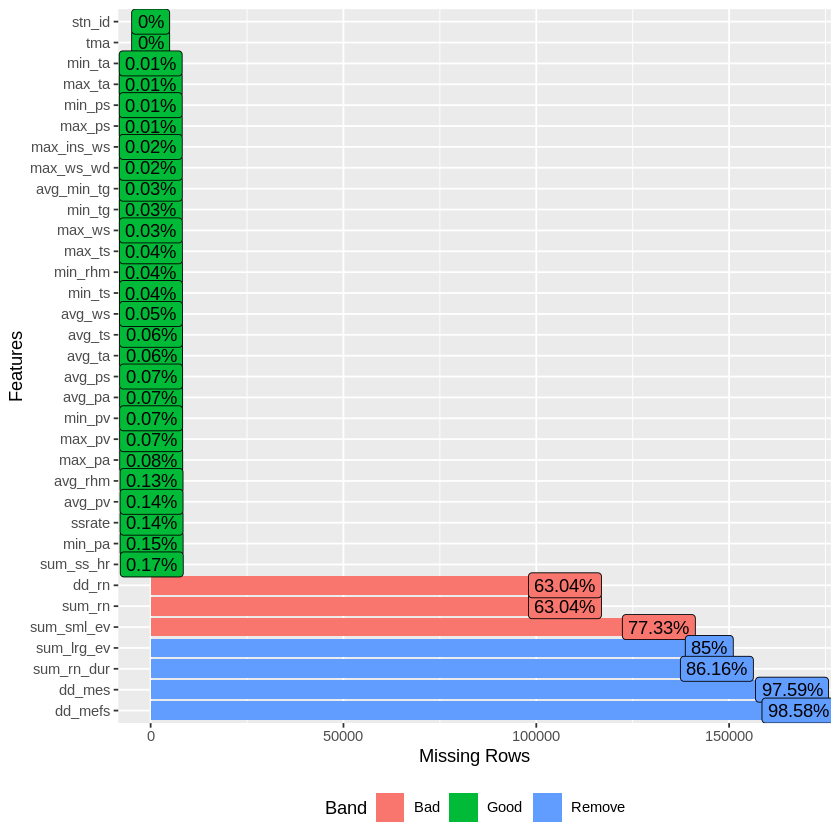

In [196]:
#stn_id 필터 전
plot_missing(DT)

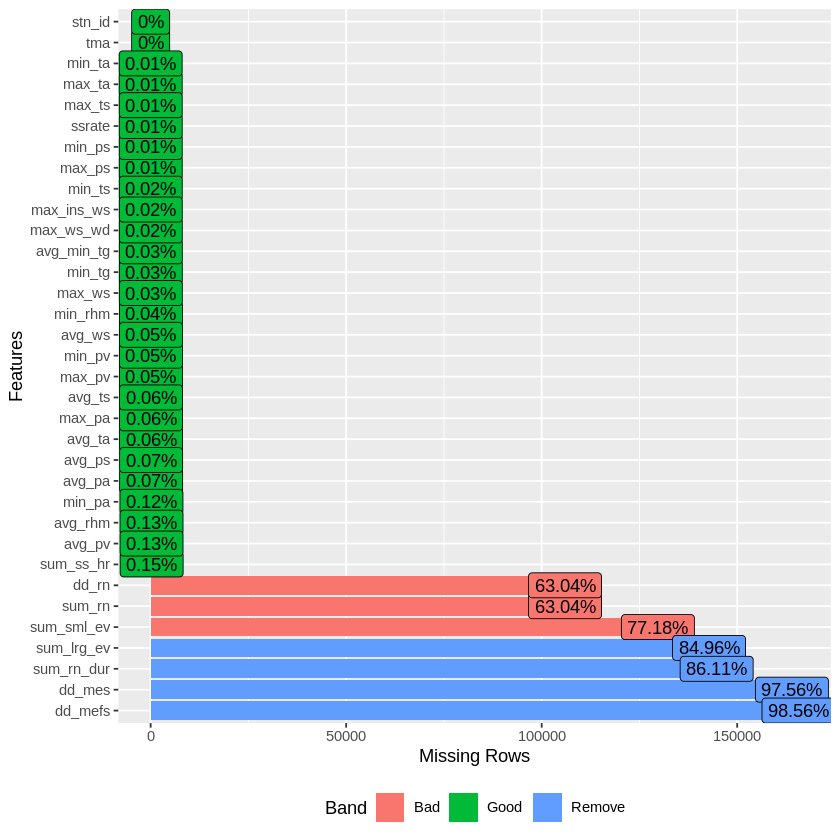

In [199]:
DT %>% filter(! stn_id  %in% c(93, 141,176,177,256,268,864) ) ->DT_filter
plot_missing(DT_filter)

In [205]:
기상관측지점 %<>% filter(! stn_id %in% c(177,268 ))

In [216]:
dt=plyr::join_all(list(DT_filter, 기상관측지점),by="stn_id", type="left")

In [218]:
#dt %>% summary # 확인

# 이상치 처리

## 1. 관측자료 물리한계 검사 기준에 의해서

In [219]:
summary(dt)

      tma                 stn_id          avg_ta           max_ta      
 Min.   :2012-01-01   Min.   : 90.0   Min.   :-18.90   Min.   :-12.80  
 1st Qu.:2013-04-01   1st Qu.:136.8   1st Qu.:  4.60   1st Qu.:  9.90  
 Median :2014-07-02   Median :201.5   Median : 14.10   Median : 20.10  
 Mean   :2014-07-02   Mean   :197.2   Mean   : 13.05   Mean   : 18.39  
 3rd Qu.:2015-10-02   3rd Qu.:257.2   3rd Qu.: 21.40   3rd Qu.: 26.70  
 Max.   :2016-12-31   Max.   :295.0   Max.   : 33.50   Max.   : 39.60  
                                      NA's   :98       NA's   :12      
     min_ta            avg_pa           max_pa         min_pa      
 Min.   :-27.700   Min.   : 900.6   Min.   :   0   Min.   :-999.9  
 1st Qu.: -0.200   1st Qu.: 997.3   1st Qu.:1000   1st Qu.: 994.6  
 Median :  9.000   Median :1006.1   Median :1009   Median :1003.6  
 Mean   :  8.444   Mean   :1003.2   Mean   :1006   Mean   :1000.4  
 3rd Qu.: 17.600   3rd Qu.:1014.1   3rd Qu.:1017   3rd Qu.:1011.4  
 Max.   : 30.900

In [221]:
#기온은 없음
#현지기압
DT[avg_pa < 500 | avg_pa > 1080, avg_pa := NA]
DT[max_pa < 500 | max_pa > 1080, max_pa := NA]
DT[min_pa < 500 | min_pa > 1080, min_pa := NA]
#해면기압
DT[avg_ps < 500 | avg_ps > 1080, avg_ps := NA]
DT[max_ps < 500 | max_ps > 1080, max_ps := NA]
DT[min_ps < 500 | min_ps > 1080, min_ps := NA]
#상대습도 없음
#일조 자료 필요
#증기압 없음
# 소형증발량 0~15, 대형증발량 자료 필요
DT[sum_sml_ev < 0 | sum_sml_ev > 15, sum_sml_ev := NA]
#초상온도 자료 필요
#지면온도
DT[max_ts < -80 | max_ts > 80, max_ts := NA]
#바람 (풍속은 없음)
DT[max_ws_wd<0, max_ws_wd :=NA]
#강수 없음
#적설 없음

## 3시그마 이론에 의해서
일조, 대형증발량, 초상온도



In [222]:
# 먼저 일조 결측치는 일조 시간이 없다고 판단하여 0으로 대체함
DT[is.na(DT$sum_ss_hr),"sum_ss_hr"] <- 0
DT[is.na(DT$ssrate),"ssrate"] <- 0

In [223]:
#plot_qq(DT[,'sum_ss_hr'])
#plot_qq(DT[,'ssrate'] )

In [224]:
sum_out=quantile( DT[,'sum_ss_hr'], probs=c(0.003, 0.997), na.rm = TRUE)[2]
ssrate_out=quantile( DT[,'ssrate'], probs=c(0.003, 0.997), na.rm = TRUE)[2]

In [225]:
DT[sum_ss_hr > sum_out, sum_ss_hr := NA]
DT[ssrate > ssrate_out, ssrate := NA]

In [226]:
#대형증발량
ev_lower=quantile( DT[,'sum_lrg_ev'], probs=c(0.003, 0.997), na.rm = TRUE)[1]
ev_upper=quantile( DT[,'sum_lrg_ev'], probs=c(0.003, 0.997), na.rm = TRUE)[2]
DT[sum_lrg_ev < ev_lower| sum_lrg_ev > ev_upper, sum_lrg_ev := NA]

In [227]:
#초상온도
min_lower = quantile( DT[,'min_tg'], probs=c(0.003, 0.997), na.rm = TRUE)[1]
min_upper = quantile( DT[,'min_tg'], probs=c(0.003, 0.997), na.rm = TRUE)[2]
avg_min_lower = quantile( DT[,'avg_min_tg'], probs=c(0.003, 0.997), na.rm = TRUE)[1]
avg_min_upper = quantile( DT[,'avg_min_tg'], probs=c(0.003, 0.997), na.rm = TRUE)[2]

DT[min_tg < min_lower | min_tg > min_upper, min_tg := NA]
DT[avg_min_tg < avg_min_lower | avg_min_tg > avg_min_upper, avg_min_tg := NA]

# ~~ts - ex. 적설~~

In [ ]:
#적설
#적설 %<>% select(tma, stn_id,dd_mes,dd_mefs)
plot_missing(적설)

In [ ]:
#install.packages("imputeTS")
library(imputeTS)

In [ ]:
적설 %>% filter( stn_id == 101)

In [ ]:
ts_적설=ts(적설, frequency=1) 

In [ ]:
ts_적설 %>% head()

In [ ]:
ggplot_na_distribution(ts_적설[,3])

# 결측치 대체

In [47]:
#install.packages("naniar")
#install.packages("VIM")
library(VIM)
require(naniar)

Loading required package: naniar



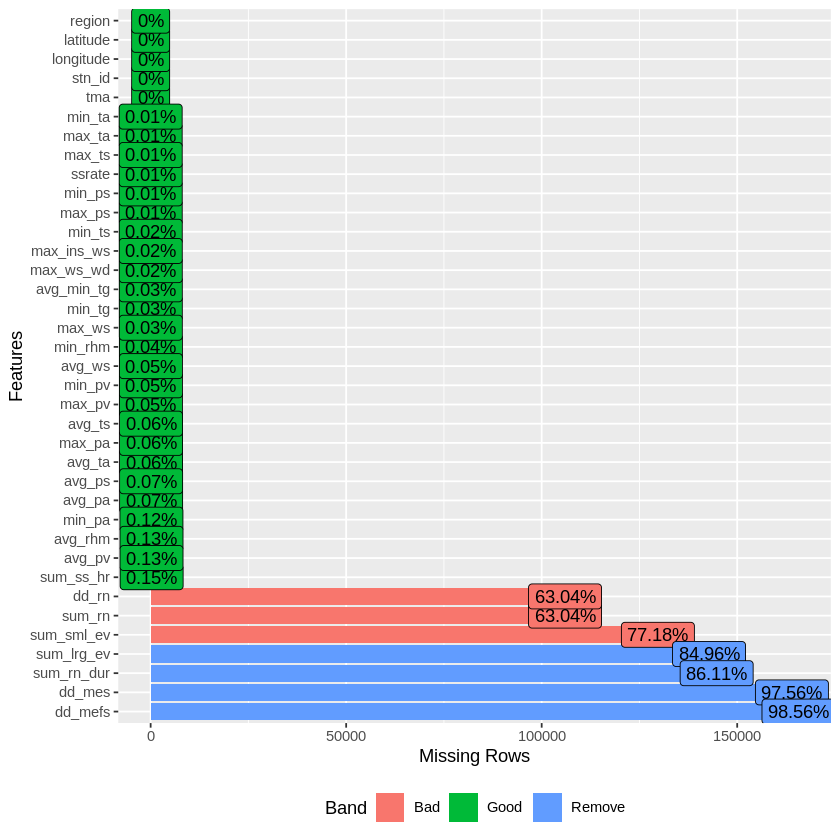

In [230]:
plot_missing(dt)
# 열기준: dd_mefs(일최심신적설 98.56), dd_mes(일최심적설 97.56), sum_rn_dur(합계 강수 계속 시간 86.11) 
# sum_lrg_ev(합계 대형 증발량84.95), sum_sml_ev(합계 소형 증발량 77.18)
# sum_rn(합계 강수량 63.04), dd_rn(일 강수량63.04)

In [254]:
#위치 확인
miss_case_summary(dt) %>% head(10) 
#행기준 :95009(86.49) , 64036(70.27), 7409(67.58), 150945(67.58), 2461(59.46), 4236(59.46)
idx=miss_case_summary(dt)[1] %>% head(10)

case,n_miss,pct_miss
<int>,<int>,<dbl>
95009,32,86.48649
64036,26,70.27027
7409,25,67.56757
150945,25,67.56757
2461,22,59.45946
4236,22,59.45946
116441,21,56.75676
64548,19,51.35135
73364,16,43.24324


In [258]:
기상관측지점 %>% filter(stn_id %in% c(276,294,201,262,271))

stn_id,longitude,latitude,region
<int>,<dbl>,<dbl>,<chr>
201,126.4463,37.70739,강화
262,127.2757,34.61824,고흥
271,128.9140,36.94400,봉화
276,129.0423,36.43210,청송군
294,128.6045,34.88818,거제


In [255]:
#인덱스 벡터로 할당
idx %>% unlist %>% as.vector -> idx_vec
dt[idx_vec,]	 # 276(청송군-경북) , 거제(경남-294), 강화(인천), 봉화(271 경북),고흥(262 전남)

tma,stn_id,avg_ta,max_ta,min_ta,avg_pa,max_pa,min_pa,avg_ps,max_ps,⋯,max_ws_wd,max_ins_ws,sum_rn,sum_rn_dur,dd_rn,dd_mes,dd_mefs,longitude,latitude,region
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2015-06-21,276,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,129.0423,36.43210,청송군
2012-09-07,294,NA,NA,NA,NA,1014.4,995.2,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,128.6045,34.88818,거제
2012-08-27,201,NA,NA,NA,NA,1006.9,1004.5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,126.4463,37.70739,강화
2015-06-22,276,NA,NA,NA,NA,987.0,956.6,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,129.0423,36.43210,청송군
2012-03-20,271,NA,NA,-5.4,NA,981.5,976.1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,128.9140,36.94400,봉화
2012-05-17,271,NA,NA,5.8,NA,1001.4,963.7,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,128.9140,36.94400,봉화
2012-05-22,262,NA,NA,12.9,NA,1010.9,1006.6,NA,1017.2,⋯,NA,NA,NA,NA,NA,NA,NA,127.2757,34.61824,고흥
2012-09-24,262,NA,NA,14.8,NA,1011.3,1006.2,NA,1017.6,⋯,NA,NA,NA,NA,NA,NA,NA,127.2757,34.61824,고흥
2013-07-10,266,NA,31.8,24.9,NA,1001.7,997.6,NA,1009.4,⋯,NA,NA,NA,NA,NA,NA,NA,127.6910,34.94300,광양시


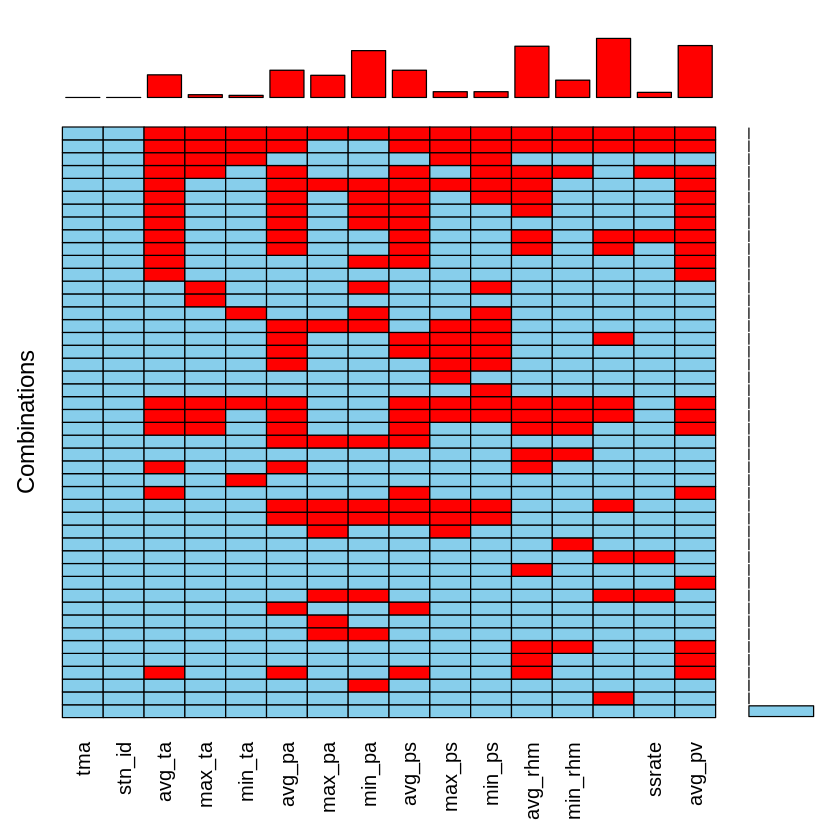


 Variables sorted by number of missings: 
   Variable  Count
 sum_rn_dur 144745
 sum_lrg_ev 142797
 sum_sml_ev 129720
     sum_rn 105965
      dd_rn 105965
     avg_ts     93
     max_pv     83
     min_pv     83
     avg_ws     80
     max_ws     48
     min_tg     46
 avg_min_tg     46
  max_ws_wd     38
 max_ins_ws     36
     min_ts     32
     max_ts     21


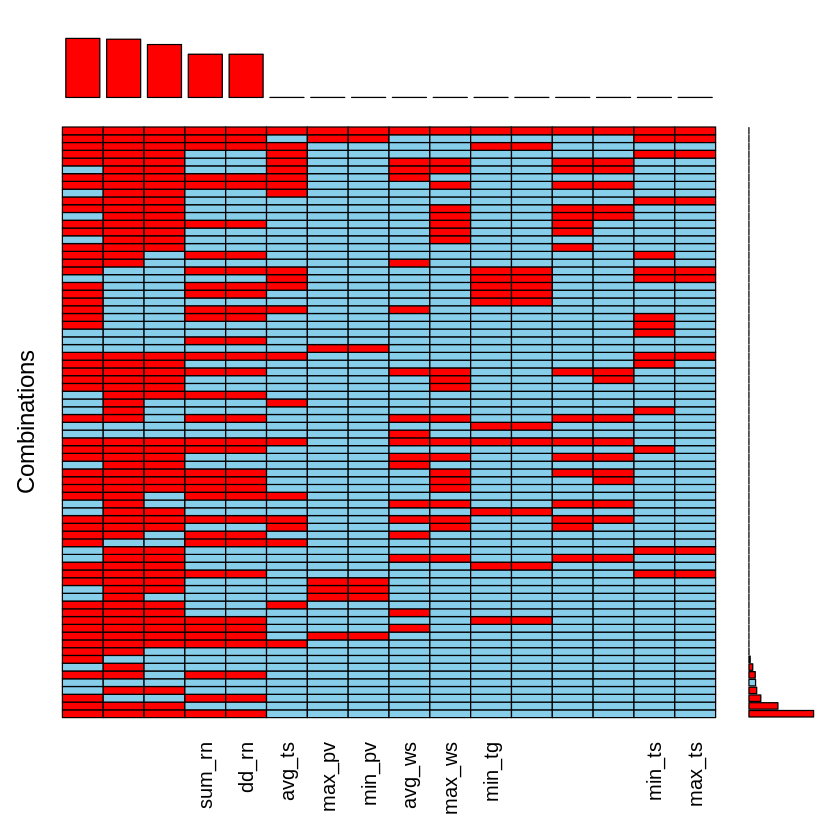

In [259]:
#그림으로 위치 확인
par(mfrow=c(1:2))
VIM::aggr(dt[,c(1:16)],  
  combined = TRUE)

VIM::aggr(dt[,c(17:32)],
  combined = TRUE)


 Variables sorted by number of missings: 
   Variable  Count
    dd_mefs 165669
     dd_mes 163991
 sum_rn_dur 144745
 sum_lrg_ev 142797
 sum_sml_ev 129720
     sum_rn 105965
      dd_rn 105965
  sum_ss_hr    256
     avg_pv    225
    avg_rhm    222
     min_pa    203
     avg_pa    118
     avg_ps    118
     avg_ta     98
     max_pa     96
     avg_ts     93
     max_pv     83
     min_pv     83
     avg_ws     80
    min_rhm     75
     max_ws     48
     min_tg     46
 avg_min_tg     46
  max_ws_wd     38
 max_ins_ws     36
     min_ts     32
     max_ps     25
     min_ps     25
     ssrate     22
     max_ts     21
     max_ta     12
     min_ta      9


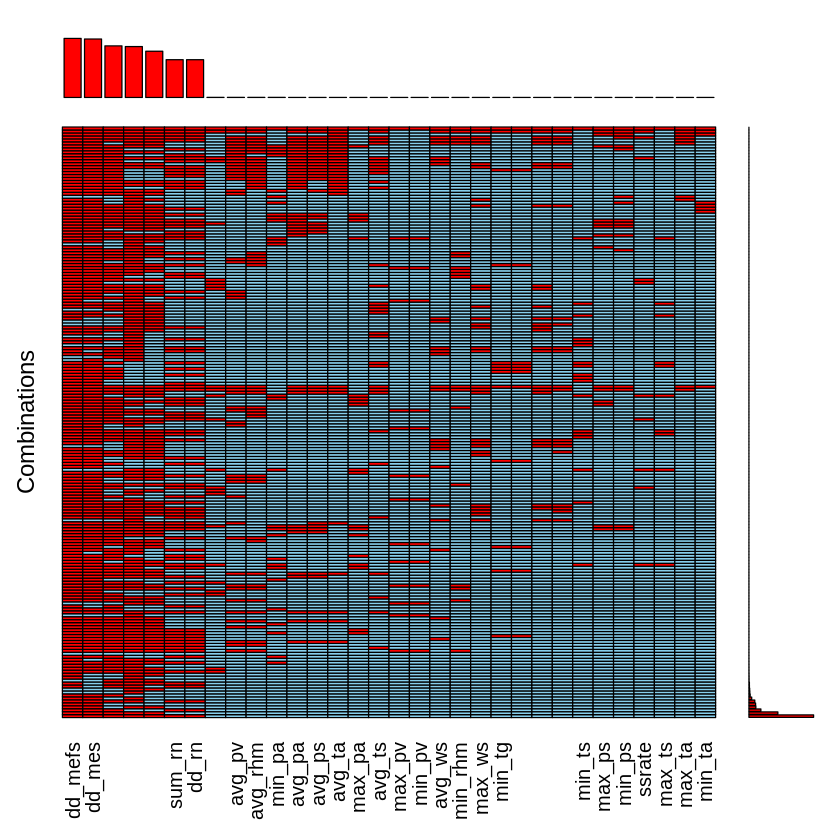

In [262]:
VIM::aggr(dt[,-c(1:2,35:37)], 
  sortVars = TRUE,
  combined = TRUE
   ) 
#끝에 갈수록 많아짐 

In [266]:
# 강수: 비가 안온 상태로 판단하고 결측치를 0으로 대체 
dt[is.na(dd_rn), dd_rn := 0]
dt[is.na(sum_rn), sum_rn := 0]
dt[is.na(sum_rn_dur), sum_rn_dur :=0]
# 적설:  눈이 안온 상태로 판단하고 결측치를 0으로 대체 
dt[is.na(dd_mefs), dd_mefs := 0]
dt[is.na(dd_mes), dd_mes := 0]
#  일조: 일조시간이 없다고 판단하여 결측치를 0으로 대체
dt[is.na(sum_ss_hr), sum_ss_hr := 0]
dt[is.na(ssrate), ssrate := 0]

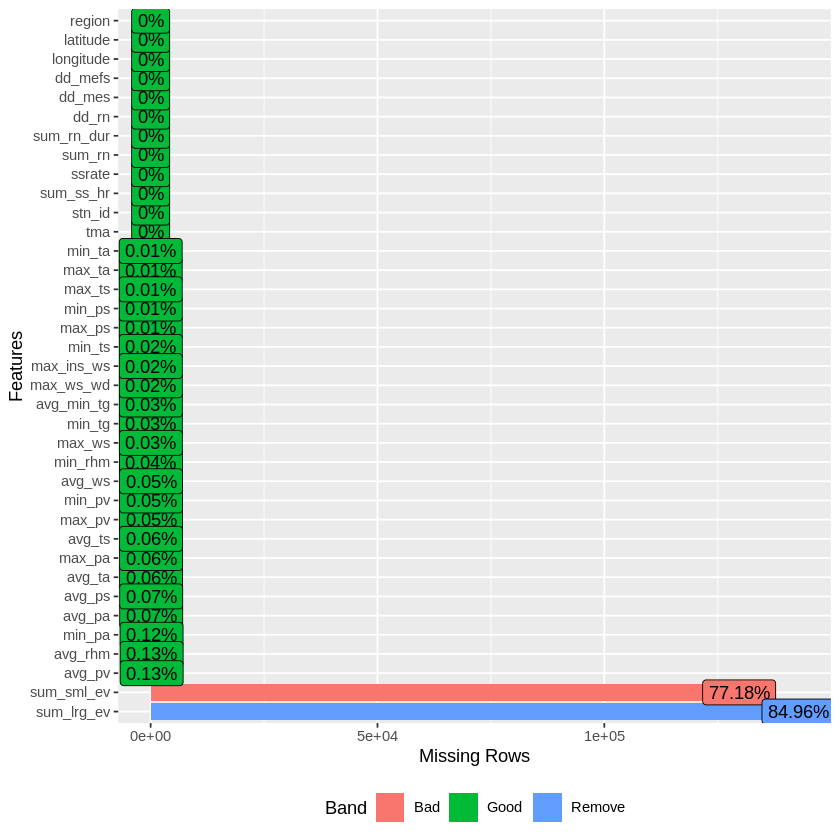


 Variables sorted by number of missings: 
   Variable  Count
 sum_lrg_ev 142797
 sum_sml_ev 129720
     avg_pv    225
    avg_rhm    222
     min_pa    203
     avg_pa    118
     avg_ps    118
     avg_ta     98
     max_pa     96
     avg_ts     93
     max_pv     83
     min_pv     83
     avg_ws     80
    min_rhm     75
     max_ws     48
     min_tg     46
 avg_min_tg     46
  max_ws_wd     38
 max_ins_ws     36
     min_ts     32
     max_ps     25
     min_ps     25
     max_ts     21
     max_ta     12
     min_ta      9
  sum_ss_hr      0
     ssrate      0
     sum_rn      0
 sum_rn_dur      0
      dd_rn      0
     dd_mes      0
    dd_mefs      0


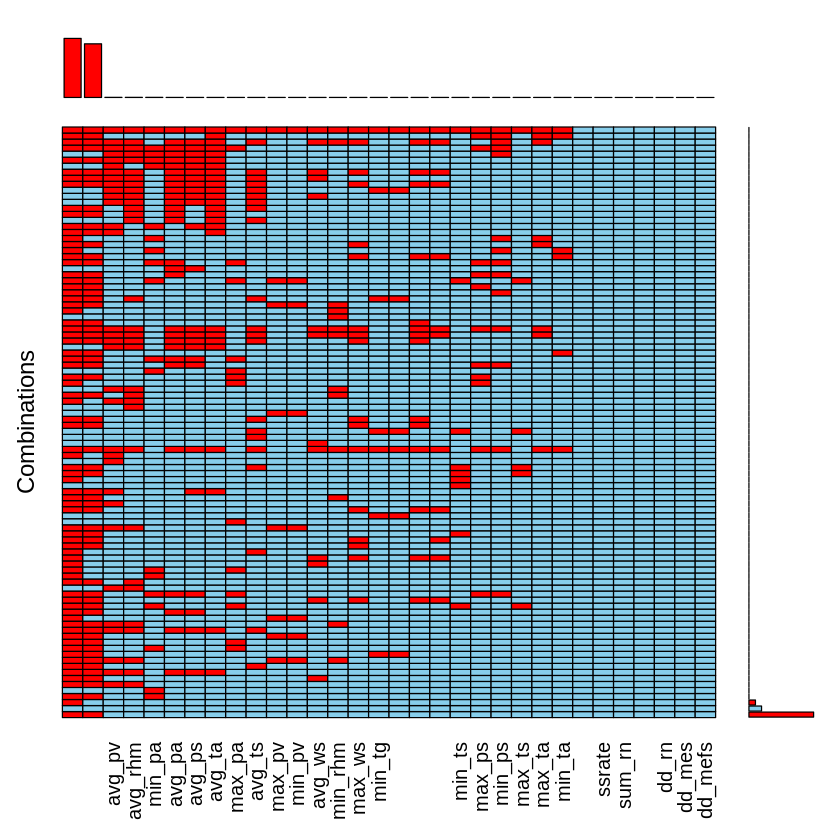

In [268]:
# 확인
plot_missing(dt)
VIM::aggr(dt[,-c(1:2,35:37)], 
  sortVars = TRUE,
  combined = TRUE
   ) 

In [269]:
write.csv(dt, "dt.csv", row.names=FALSE)

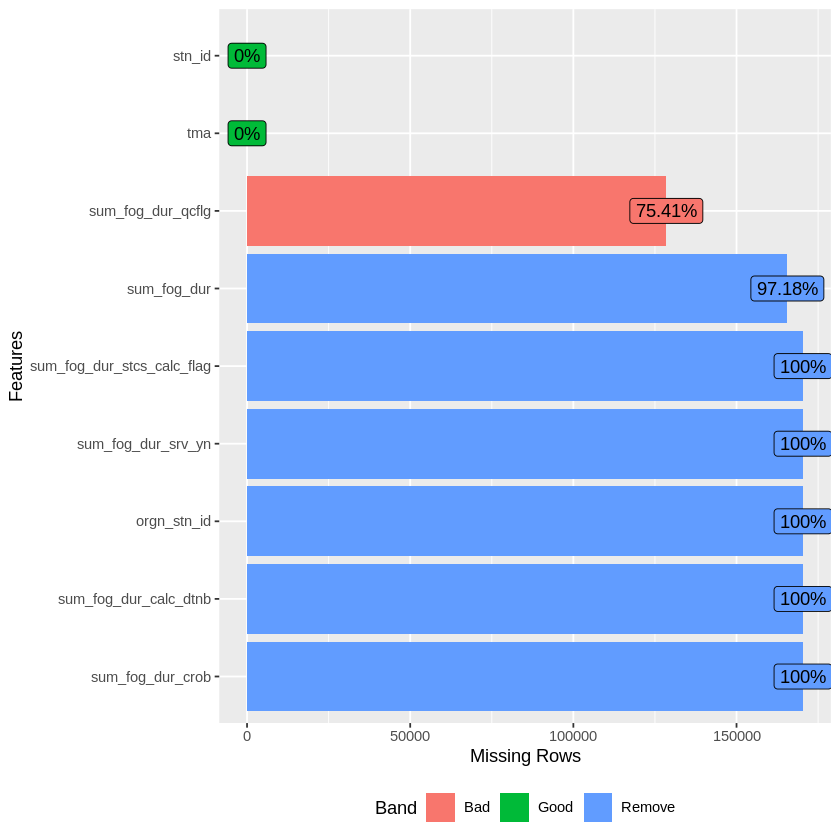

In [ ]:
plot_missing(안개)

- `구름` -> DB_SFC_NMYR_CLOUD_DD ( 구름) 추출
- `안개` -> DB_SFC_RHM_DD_COMP (안개 계속시간, fog_dur)
- `상대습도` -> DB_AWS_RHM_TIM 상대습도 (최대있음) 
- `일조` -> DB_AWS_ICSR_SS_DD: DB:AWS:일사:일조:일

In [ ]:
names(상대습도)

[1] "tma"     "stn_id"  "avg_rhm" "min_rhm"

In [ ]:
sqldf("select * from 기압 limit 5")

db_sfc_prsr_dd.tma,db_sfc_prsr_dd.stn_id,db_sfc_prsr_dd.avg_pa,db_sfc_prsr_dd.avg_pa_qcflg,db_sfc_prsr_dd.avg_pa_crob,db_sfc_prsr_dd.max_pa,db_sfc_prsr_dd.max_pa_qcflg,db_sfc_prsr_dd.max_pa_crob,db_sfc_prsr_dd.max_pa_hrmt,db_sfc_prsr_dd.min_pa,⋯,db_sfc_prsr_dd.max_ps_srv_yn,db_sfc_prsr_dd.max_ps_stcs_calc_flag,db_sfc_prsr_dd.min_pa_hrmt_srv_yn,db_sfc_prsr_dd.min_pa_srv_yn,db_sfc_prsr_dd.min_pa_stcs_calc_flag,db_sfc_prsr_dd.min_ps_hrmt_srv_yn,db_sfc_prsr_dd.min_ps_hrmt_stcs_calc_flag,db_sfc_prsr_dd.min_ps_srv_yn,db_sfc_prsr_dd.min_ps_stcs_calc_flag,db_sfc_prsr_dd.orgn_stn_id
<dttm>,<int>,<dbl>,<int>,<lgl>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<lgl>,<int>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<int>,<lgl>
2012-01-01,95,1005.3,NA,NA,1007.2,NA,NA,2118,1002.3,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,98,1010.6,NA,NA,1012.7,NA,NA,2040,1007.6,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,100,927.5,NA,NA,929.3,NA,NA,1,924.8,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,112,1016.4,NA,NA,1018.5,NA,NA,1953,1014.2,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA
2012-01-01,114,1005.2,NA,NA,1007.2,NA,NA,2316,1002.3,⋯,NA,4,NA,NA,4,NA,NA,NA,4,NA


In [ ]:
기온 %>% head

tma,stn_id,avg_ta,max_ta,min_ta
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2012-01-01,104,0.0,4.0,-3.5
2012-01-01,106,1.6,5.3,-1.1
2012-01-01,112,-2.3,1.3,-5.8
2012-01-01,115,1.9,4.3,-1.5
2012-01-01,121,-2.8,1.8,-7.7
2012-01-01,127,-2.8,1.7,-9.4


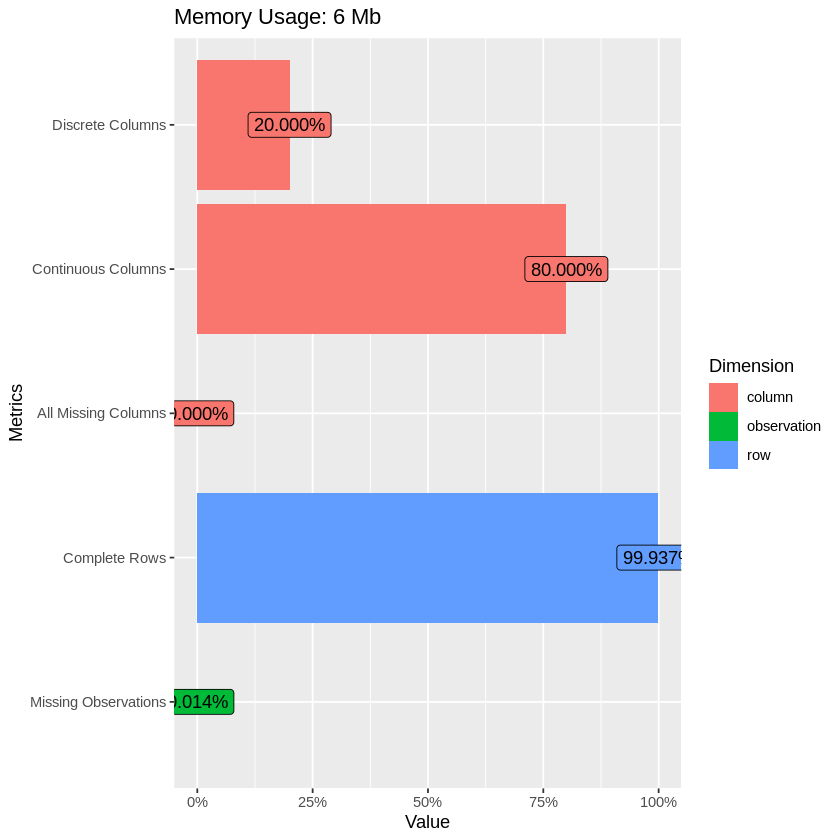

In [ ]:
plot_intro(기온) 

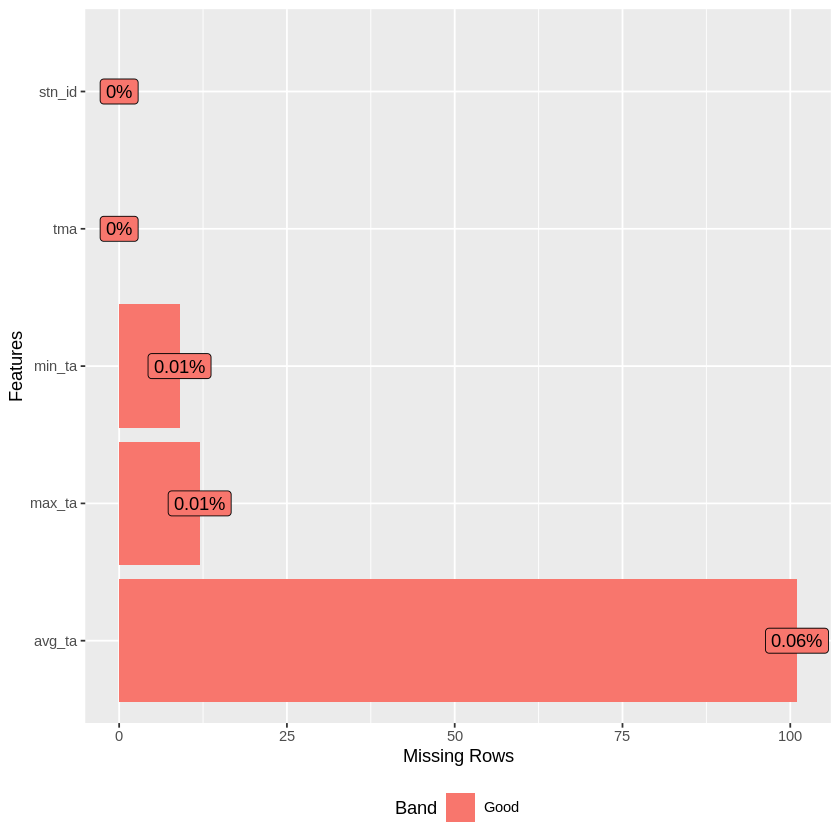

In [ ]:
plot_missing(기온)

미씽존재!!

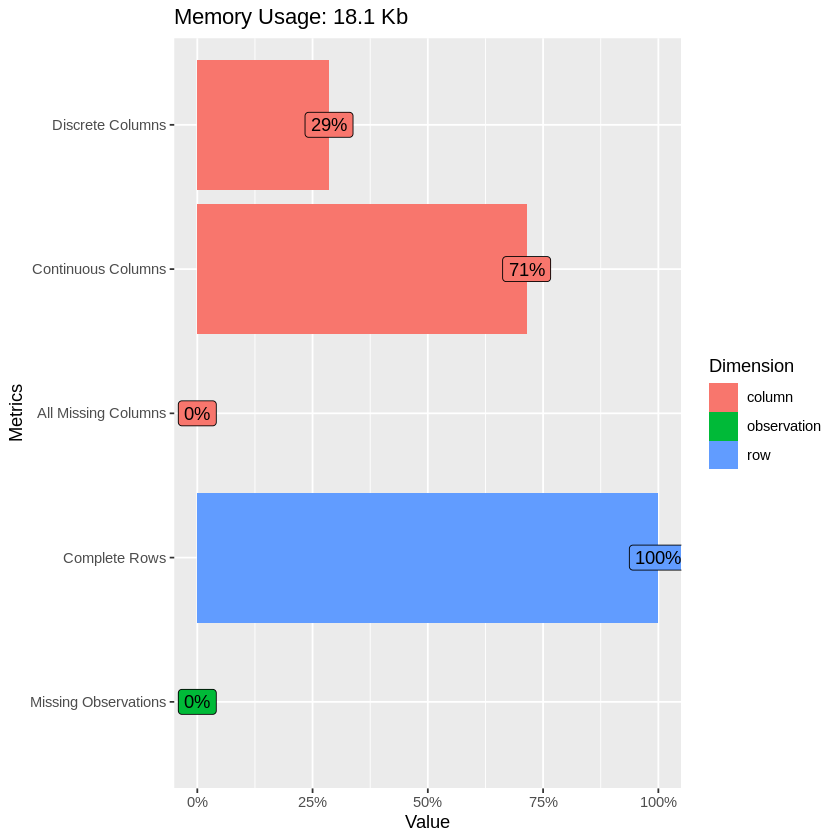

In [ ]:
plot_intro(기상관측지점)

In [ ]:
기온$stn_id  %>% table 

.
  90   93   95   98   99  100  101  102  104  105  106  108  112  114  115  119 
1827   92 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 121  127  129  130  131  133  135  136  137  138  140  141  143  146  152  155 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827    9 1827 1827 1827 1827 
 156  159  162  165  168  169  170  172  174  175  176  177  184  185  188  189 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827  619  424 1827 1827 1827 1827 
 192  201  202  203  211  212  216  217  221  226  232  235  236  238  243  244 
1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 245  247  248  251  252  253  254  255  256  257  258  259  260  261  262  263 
1827 1827 1827 1827 1827 1827 1827 1827  184 1827 1827 1827 1827 1827 1827 1827 
 264  266  268  271  272  273  276  277  278  279  281  283  284  285  288  289 
1827 1827  967 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 1827 
 294  295  864 
1827 1827 

결측치 위치 보기